Partie réalisée par 
- Calligaro Nicolas

In [6]:
import pickle
from Algo_projet import *
from ipyleaflet import Map, basemaps, FullScreenControl, AwesomeIcon
import seaborn as sns

# Question : 
Etude des flux de circulation lors des périodes d'embauche et débauche (en semaine 8h / 17h)

In [7]:
df_Trajet=pickle.Unpickler(open("df_Trajet.pkl",'rb')).load()
df_Coord_Gps=pickle.Unpickler(open("df_Coord_Gps.pkl",'rb')).load()

# Flux début de journée 8h

In [8]:
df_embauche = Get_Slice (df_Trajet,'week',(7,0),(9,0))
df_embauche.shape

(12012, 9)

In [9]:
G,DG= Prod_Graph(df_embauche,deep=5)
ilot_matin,passerelle_matin,_ = Nettoyage (G)
SG,LG= reduced_graph(G,DG)

## Flux de circulation

In [10]:
m2 = Map(center=(51.50, -0.12), zoom=12,basemap=basemaps.Esri.WorldTopoMap)
m2.add_control(FullScreenControl())
#On affiche les markers des stations concerné
Single_Markers = Give_Marker(df_Coord_Gps,LG)
#On affiche le flux en Ant Path, la couleur indiquant la fréquence d'utilisation du chemin
my_path=Prod_Ant_Path(df_Coord_Gps,LG)
#m2.add_layer(Clustered_Markers)
for i in my_path :
    m2.add_layer(my_path[i])
for marker in Single_Markers :
    m2.add_layer(marker)
display(m2)

Map(center=[51.5, -0.12], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

## Visualisation du graph représenté

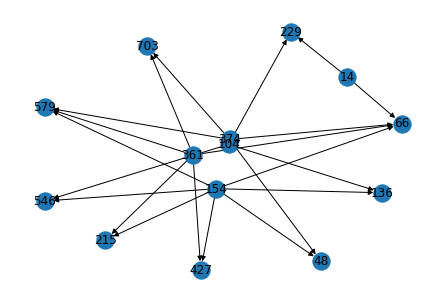

In [11]:
nx.draw(LG, with_labels=True)

## Stations au départ et leurs destinations

In [12]:
m1 = Map(center=(51.50, -0.12), zoom=12,basemap=basemaps.Esri.WorldTopoMap)
m1.add_control(FullScreenControl())
#On affiche les markers des stations concernées
Single_Markers = Give_Marker(df_Coord_Gps,SG)
#On affiche le flux ligne simple, la couleur est lié 
my_path=Prod_Polyline(df_Coord_Gps,SG)

for i in my_path :
    m1.add_layer(my_path[i])
for marker in Single_Markers :
    m1.add_layer(marker)
display(m1)

Map(center=[51.5, -0.12], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

## Graph du flux

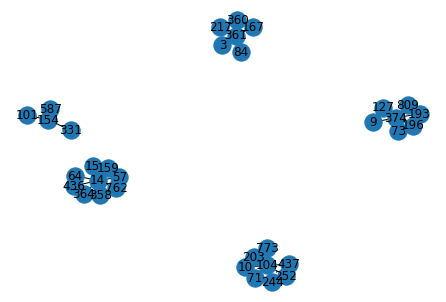

In [13]:
nx.draw(SG, with_labels=True)

# Conclusion de cette période (Matin)
Nous avons mis en évidence les 5 Stations ayant le plus de départ. Ainsi que toutes les stations d'arrivés.\
On constate une forme émergeante : Ilot.\
Ce qui met en évidence un flux de départ (zone d'habitation ou de circulation : train) vers des zones d'arrivés (zone de travail ou autre)\

In [14]:
print(f"Station au départ : {ilot_matin}\n"
      f"Station à l'arrivé : {passerelle_matin}")

Station au départ : [154, 14, 374, 361, 104]
Station à l'arrivé : [48, 136, 579, 546, 215, 66, 427, 229, 703]


# Flux fin de journée 17h

In [15]:
df_debauche = Get_Slice (df_Trajet,'week',(16,0),(18,0))
df_debauche.shape

(12251, 9)

In [16]:
G,DG= Prod_Graph(df_debauche,deep=5)
ilot_soir,passerelle_soir,_ = Nettoyage (G)
SG,LG= reduced_graph(G,DG)

## Flux de circulation

In [17]:
m3 = Map(center=(51.50, -0.12), zoom=13,basemap=basemaps.Esri.WorldTopoMap)
m3.add_control(FullScreenControl())
#On affiche les markers des stations concerné
Single_Markers = Give_Marker(df_Coord_Gps,LG)
#On affiche le flux en Ant Path, la couleur indiquant la fréquence d'utilisation du chemin
my_path=Prod_Ant_Path(df_Coord_Gps,LG)
for i in my_path :
    m3.add_layer(my_path[i])
for marker in Single_Markers :
    m3.add_layer(marker)
display(m3)

Map(center=[51.5, -0.12], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

## Visualisation du graph représenté

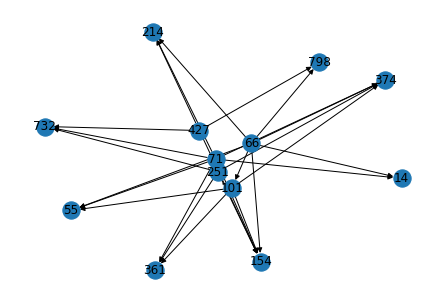

In [18]:
nx.draw(LG, with_labels=True)

## Stations au départ et leurs destinations

In [19]:
m4 = Map(center=(51.50, -0.12), zoom=12,basemap=basemaps.Esri.WorldTopoMap)
m4.add_control(FullScreenControl())
#On affiche les markers des stations concernées
Single_Markers = Give_Marker(df_Coord_Gps,SG)
#On affiche le flux ligne simple, la couleur est lié 
my_path=Prod_Polyline(df_Coord_Gps,SG)
for i in my_path :
    m4.add_layer(my_path[i])
for marker in Single_Markers :
    m4.add_layer(marker)
display(m4)

Map(center=[51.5, -0.12], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

## Visualisation du graph représenté

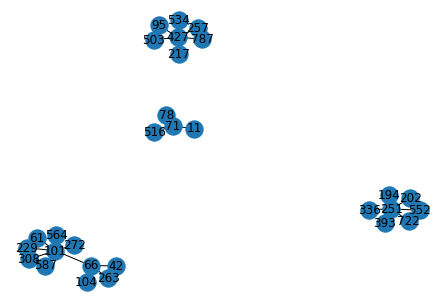

In [20]:
nx.draw(SG, with_labels=True)

# Conclusion de cette période (Soir)
Nous avons mis en évidence les 5 Stations ayant le plus de départ. Ainsi que toutes les stations d'arrivés.\
On constate une forme émergeante : Ilot.\
Situation identique au créneau horraire du matin.
Ce qui met en évidence un flux de départ (zone de travail) vers des zones d'arrivés (zone d'habitation ou circulation)\

In [21]:
print(f"Station au départ : {ilot_soir}\n"
      f"Station à l'arrivé : {passerelle_soir}")

Station au départ : [66, 101, 251, 71, 427]
Station à l'arrivé : [154, 14, 55, 214, 374, 798, 361, 732]


# Conclusion sur le flux du matin et du soir 

In [22]:
print(f"Station au départ du matin : {sorted(ilot_matin)}\n",end='')
print(f"Station à l'arrivé du soir : {sorted(passerelle_soir)}\n")
print(f"On peut voir le flux aller retour entre le matin et le soir")

Station au départ du matin : [14, 104, 154, 361, 374]
Station à l'arrivé du soir : [14, 55, 154, 214, 361, 374, 732, 798]

On peut voir le flux aller retour entre le matin et le soir


# Flux du Week End

In [23]:
df_debauche = Get_Slice (df_Trajet,'wend',(14,0),(19,0))
df_debauche.shape

(9501, 9)

In [24]:
G,DG= Prod_Graph(df_debauche)
ilot_we,passerelle_we,_ = Nettoyage(G)
SG,LG= reduced_graph(G,DG)

## Flux de circulation

In [25]:
m5 = Map(center=(51.50, -0.12), zoom=12,basemap=basemaps.Esri.WorldTopoMap)
m5.add_control(FullScreenControl())
#On affiche les markers des stations concerné
Single_Markers = Give_Marker(df_Coord_Gps,LG)
#On affiche le flux en Ant Path, la couleur indiquant la fréquence d'utilisation du chemin
my_path=Prod_Ant_Path(df_Coord_Gps,LG)
#m2.add_layer(Clustered_Markers)
for i in my_path :
    m5.add_layer(my_path[i])
for marker in Single_Markers :
    m5.add_layer(marker)
display(m5)

Map(center=[51.5, -0.12], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

## Visualisation du graph représenté

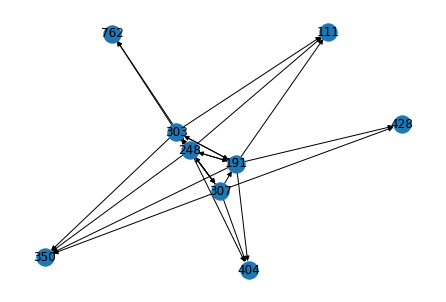

In [26]:
nx.draw(LG, with_labels=True)

## Stations au départ et leurs destinations

In [27]:
m6 = Map(center=(51.50, -0.12), zoom=12,basemap=basemaps.Esri.WorldTopoMap)
m6.add_control(FullScreenControl())
#On affiche les markers des stations concernées
Single_Markers = Give_Marker(df_Coord_Gps,SG)
#On affiche le flux ligne simple, la couleur est lié 
my_path=Prod_Polyline(df_Coord_Gps,SG)
for i in my_path :
    m6.add_layer(my_path[i]) 
for marker in Single_Markers :
    m6.add_layer(marker)
display(m6)

Map(center=[51.5, -0.12], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

## Visualisation du graph représenté

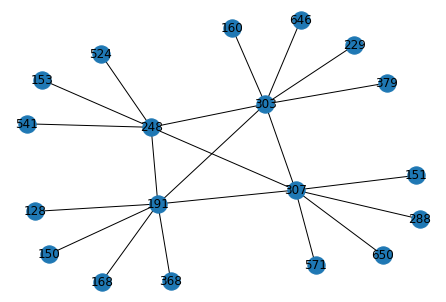

In [28]:
nx.draw(SG, with_labels=True)

# Conclusion sur le flux du matin et du soir 
On peut voir que le Week End il n'y a pas de flux aller retour comme identifié en semaine.
On voit cependant un parti fortement connexe dans le graph (les stations centrales)
Et on peut voir des stations périphériques autour.

In [29]:
print(f"Station centrale : {ilot_we}\n"
      f"Station périphérique : {passerelle_we}")

Station centrale : [191, 303, 248, 307]
Station périphérique : [111, 404, 350, 428, 762]


# Corrélation de toutes les stations identifiées

In [30]:
#top20_full=sorted(list(df_Trajet['StartStation Id'].value_counts()[:20].index))
top10_week=sorted(list(Get_Slice (df_Trajet,'week',(0,0),(23,50))['StartStation Id'].value_counts()[:10].index))
top10_wend=sorted(list(Get_Slice (df_Trajet,'wend',(0,0),(23,50))['StartStation Id'].value_counts()[:10].index))

In [31]:
Top10_Week=[]
for x in top10_week :
    for y in (ilot_matin+ilot_soir) :
        if y == x :
            Top10_Week.append(x)  
Top10_Wend=[]
for x in top10_wend :
    for y in (ilot_we) :
        if y == x :
            Top10_Wend.append(x)

Top10_Week,Top10_Wend

([14, 101, 104, 154, 251, 374], [191, 248, 303, 307])

In [32]:
Top10_Week

[14, 101, 104, 154, 251, 374]

Voici celles qui appraissane le plus le Week End:

In [33]:
Top10_Wend

[191, 248, 303, 307]

In [34]:
#['white', 'red', 'darkred', 'lightred', 'orange', 'beige', 'green', 'darkgreen', 'lightgreen', 'blue', 'darkblue', 
#'lightblue', 'purple', 'darkpurple', 'pink', 'cadetblue', 'white', 'gray', 'lightgray', 'black']
m7= Map(center=(51.50, -0.12), zoom=12,basemap=basemaps.Esri.WorldTopoMap)
m7.add_control(FullScreenControl())

Icone_Week = AwesomeIcon(
    name='week',
    marker_color= 'green'
    ,icon_color='black',
    spin=False
)
Icone_Wend = AwesomeIcon(
    name='wend',
    marker_color= 'orange'
    ,icon_color= 'black',
    spin=False
)

markerweek=Give_Colored_Marker(df_Coord_Gps,Top10_Week,Icone_Week)
markerwend=Give_Colored_Marker(df_Coord_Gps,Top10_Wend,Icone_Wend)

for marker in markerweek :
    m7.add_layer(marker)
for marker in markerwend :
    m7.add_layer(marker)


display(m7)

Map(center=[51.5, -0.12], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

## Conclusion sur les Stations observées

On voit bien que les stations du week end et de la semaine font toutes partis des stations les plus utilisées.\
Il y a donc 2 zones a aménager et de façon différentes\
Week End : \
Activité de famille.\
Zone localisée autour du parc\
Semaine : \
Activité de travail.\
Zone localisée autour de gare de train